test (1).png -> Predicted Class: 1 (Confidence: 0.9991)
test (10).png -> Predicted Class: 5 (Confidence: 0.9997)
test (2).png -> Predicted Class: 3 (Confidence: 0.9578)
test (3).png -> Predicted Class: 4 (Confidence: 0.9999)
test (4).png -> Predicted Class: 5 (Confidence: 0.9943)
test (5).png -> Predicted Class: 3 (Confidence: 0.9751)
test (6).png -> Predicted Class: 0 (Confidence: 0.9996)
test (7).png -> Predicted Class: 1 (Confidence: 0.9988)
test (8).png -> Predicted Class: 0 (Confidence: 0.9980)
test (9).png -> Predicted Class: 3 (Confidence: 0.9949)

Showing predictions along with confidence:


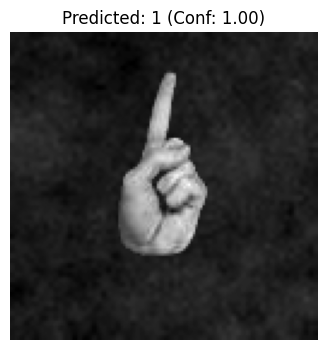

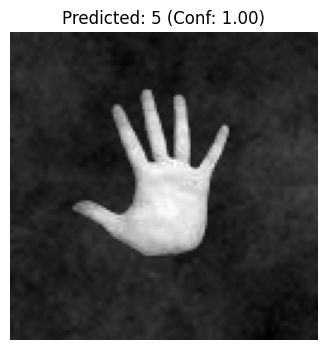

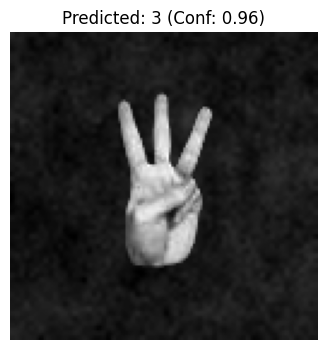

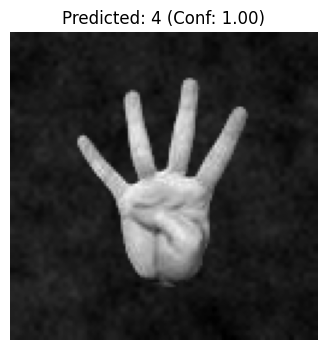

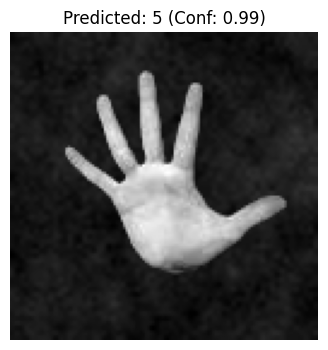

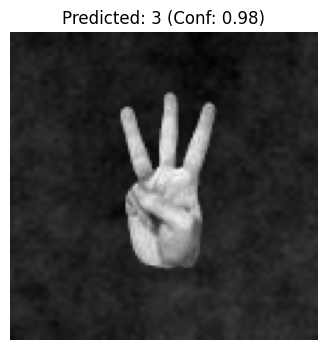

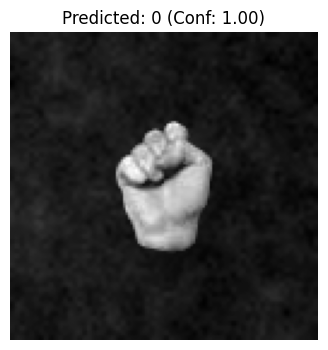

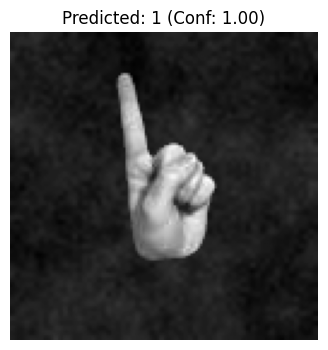

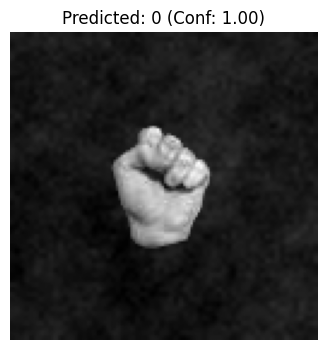

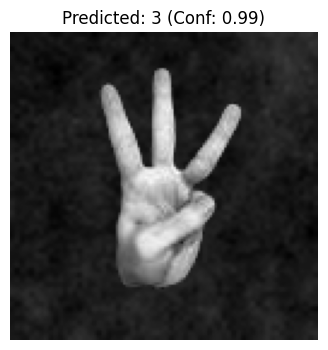

In [ ]:
import numpy as np
import cv2
import os
import tensorflow as tf
import glob
import matplotlib.pyplot as plt
import random

IMAGE_SIZE = 128
MODEL_PATH = 'fingers_detection.keras'
TEST_FOLDER = './testing_imgs'

def load_dataset(path):
    dataset = [(int(img_path[-6]), load_image(img_path)) for img_path in glob.glob(path)]
    return dataset

def load_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE).astype(np.uint8)
    img = np.reshape(img, (IMAGE_SIZE, IMAGE_SIZE))
    return img

def show_image(img):
    plt.imshow(img, cmap='gray')
    plt.show()

def show_images(dataset, grid_size=5):
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(12, 12))
    axes = [y for x in axes for y in x]
    for (i, (label, img)) in enumerate(random.sample(dataset, grid_size**2)):
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(label)
        axes[i].axis('off')

def process_image(img):
    img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
    img = img.astype(np.float32) / 255.0
    img = np.reshape(img, (IMAGE_SIZE, IMAGE_SIZE, 1))  # basically 1 is channel dimension here (grayscale)...
    return img

def process_dataset(dataset):
    dataset = [(label, process_image(img)) for (label, img) in dataset]
    return dataset

model = tf.keras.models.load_model(MODEL_PATH)

test_images = glob.glob(os.path.join(TEST_FOLDER, '*'))
results = []

for image_path in test_images:
    try:
        img = load_image(image_path)
        processed_img = process_image(img)
        img_batch = np.expand_dims(processed_img, axis=0)
        
        predictions = model.predict(img_batch, verbose=0)
        predicted_class = np.argmax(predictions)
        prediction_confidence = np.max(predictions)
        
        results.append((image_path, predicted_class, prediction_confidence))
        
        print(f"{os.path.basename(image_path)} -> Predicted Class: {predicted_class} (Confidence: {prediction_confidence:.4f})")
            
    except Exception as e:
        print(f"Error processing {image_path}: {e}")

print("\nShowing predictions along with confidence:")
for i in range(len(results)):
    img_path, pred_class, conf = results[i]
    img = load_image(img_path)
    plt.figure(figsize=(4, 4))
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted: {pred_class} (Conf: {conf:.2f})")
    plt.axis('off')
    plt.show()